In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [6]:
cities_path = os.path.join("..","Resources","cities_housing.csv")
national_path = os.path.join("..","Resources","national_housing.csv")
states_path = os.path.join("..","Resources","tx_housing.csv")

In [7]:
cities_housing_df = pd.read_csv(cities_path)
national_housing_df = pd.read_csv(national_path)
states_housing_df = pd.read_csv(states_path)

In [8]:
housing_df = cities_housing_df.append([national_housing_df, states_housing_df])
housing_df.head()

,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy
0,"Texas City, TX",February 2012,All Residential,Place/City,False,TX,0.939615,-0.5%,NaN,16,...,NaN,114,42,NaN,$73K,-2.0%,NaN,50,4.2%,NaN
1,"Pasadena, TX",May 2012,All Residential,Place/City,False,TX,0.975172,1.2%,2.0%,74,...,-26.2%,86,29,42.0,$115K,15.7%,23.3%,99,-19.5%,-14.7%
2,"Conroe, TX",July 2012,All Residential,Place/City,False,TX,0.967148,1.2%,1.0%,150,...,-8.2%,64,1,-13.0,$160K,-8.3%,2.7%,186,-3.6%,12.7%
3,"Pasadena, TX",July 2012,All Residential,Place/City,False,TX,0.952727,-3.4%,-0.5%,74,...,-23.2%,61,30,-5.0,$95K,-4.9%,-3.3%,105,-7.1%,-8.7%
4,"Texas City, TX",October 2012,All Residential,Place/City,False,TX,0.913395,-0.3%,NaN,32,...,NaN,69,-21,NaN,$55K,-26.6%,NaN,54,-1.8%,NaN


In [30]:
# DELETE  output = os.path.join("..","Resources","housing_data_merged.csv")
# housing_df.to_csv(output)


# housing_df["Median Sale Price"] = housing_df["Median Sale Price"].str.lower().replace('k','',regex=True)
# housing_df["Median Sale Price"] = housing_df["Median Sale Price"].str.replace('$','',regex=True)
# housing_df["Median Sale Price"] = housing_df["Median Sale Price"].astype(float)
# housing_df["Median Sale Price"] = housing_df["Median Sale Price"] * 1000
housing_df


,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy
0,"Texas City, TX",February 2012,All Residential,Place/City,False,TX,0.939615,-0.5%,NaN,16,...,NaN,114,42,NaN,73000.0,-2.0%,NaN,50,4.2%,NaN
1,"Pasadena, TX",May 2012,All Residential,Place/City,False,TX,0.975172,1.2%,2.0%,74,...,-26.2%,86,29,42.0,115000.0,15.7%,23.3%,99,-19.5%,-14.7%
2,"Conroe, TX",July 2012,All Residential,Place/City,False,TX,0.967148,1.2%,1.0%,150,...,-8.2%,64,1,-13.0,160000.0,-8.3%,2.7%,186,-3.6%,12.7%
3,"Pasadena, TX",July 2012,All Residential,Place/City,False,TX,0.952727,-3.4%,-0.5%,74,...,-23.2%,61,30,-5.0,95000.0,-4.9%,-3.3%,105,-7.1%,-8.7%
4,"Texas City, TX",October 2012,All Residential,Place/City,False,TX,0.913395,-0.3%,NaN,32,...,NaN,69,-21,NaN,55000.0,-26.6%,NaN,54,-1.8%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Texas,August 2017,All Residential,State,False,TX,0.981622,-0.2%,0.0%,25387,...,9.0%,35,2,0.0,242000.0,-0.2%,5.7%,29298,-12.7%,1.1%
98,Texas,December 2019,All Residential,State,False,TX,0.975966,-0.1%,0.1%,25131,...,-2.6%,55,5,-1.0,260000.0,3.2%,5.0%,18092,-20.4%,5.6%
99,Texas,February 2015,All Residential,State,False,TX,0.976078,0.3%,0.3%,15403,...,-2.2%,47,-5,-6.0,199000.0,4.2%,7.3%,23249,5.8%,2.9%
100,Texas,March 2020,All Residential,State,False,TX,0.980959,0.4%,0.3%,25214,...,-5.6%,44,-14,-4.0,263000.0,2.4%,5.2%,32962,8.9%,-6.3%


In [37]:
housing_df.describe()

,Avg Sale To List,Homes Sold,Inventory,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,New Listings
count,1224.000000,1224.000000,1.224000e+03,1224.000000,1224.000000,1214.000000,1224.000000,1224.000000
mean,0.971266,42809.964052,1.503586e+05,45.558824,-0.504902,-5.643328,209177.287582,52380.428922
std,0.012126,137398.319862,4.798254e+05,21.358057,14.320761,31.094815,57504.100807,168840.837704
min,0.889938,16.000000,8.800000e+01,7.000000,-78.000000,-661.000000,55000.000000,25.000000
25%,0.966645,85.000000,2.620000e+02,30.000000,-7.000000,-14.000000,170000.000000,105.750000
50%,0.973471,136.000000,4.985000e+02,43.000000,1.000000,-2.000000,210000.000000,174.000000
75%,0.979311,646.500000,2.098750e+03,57.000000,6.000000,5.000000,248000.000000,732.500000
max,1.006847,692619.000000,2.162916e+06,146.000000,63.000000,99.000000,389000.000000,835866.000000


In [55]:
housing_df["Month of Period End"] = pd.to_datetime(housing_df["Month of Period End"],format='%B %Y')

# grouped__housing_df = housing_df.groupby("Region")
housing_df = housing_df.sort_values(by="Month of Period End")
housing_df.head()

,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy
0,"Texas City, TX",2012-02-01,All Residential,Place/City,False,TX,0.939615,-0.5%,NaN,16,...,NaN,114,42,NaN,73000.0,-2.0%,NaN,50,4.2%,NaN
559,"League City, TX",2012-02-01,All Residential,Place/City,False,TX,0.970863,1.6%,2.6%,123,...,24.8%,93,-12,58.0,160000.0,-9.6%,137.0%,174,30.8%,126.0%
92,National,2012-02-01,All Residential,National,False,US,0.958336,0.2%,0.3%,305040,...,-16.2%,97,1,-10.0,161000.0,0.9%,-1.8%,514821,7.5%,6.1%
978,"Missouri City, TX",2012-02-01,All Residential,Place/City,False,TX,0.966081,1.6%,1.7%,88,...,-27.8%,105,-2,17.0,185000.0,7.5%,9.4%,154,13.2%,13.2%
1001,"Conroe, TX",2012-02-01,All Residential,Place/City,False,TX,0.953836,-0.4%,1.3%,82,...,-12.3%,103,24,-2.0,133000.0,1.9%,-16.2%,147,-1.3%,13.1%


## Median Housing Price per City (line  graph)

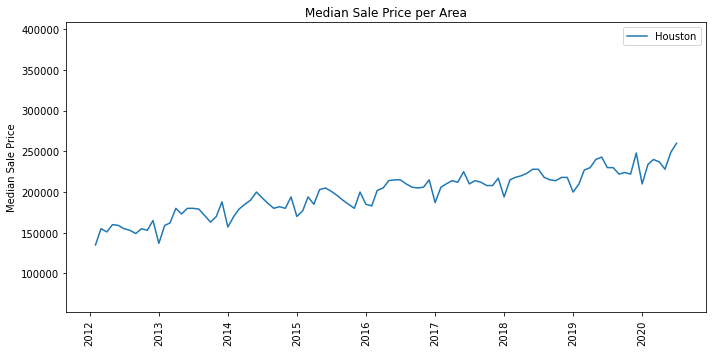

In [62]:
# grouped_housing_df = housing_df.groupby('Region')
houston = housing_df.loc[housing_df["Region"] == "Houston, TX"]
plt.figure(figsize = (10,5))
plt.plot(houston["Month of Period End"],houston["Median Sale Price"], label="Houston")
plt.ylim(min(housing_df["Median Sale Price"])*.95, max(housing_df["Median Sale Price"])*1.05)
plt.xticks(rotation=90)
plt.ylabel("Median Sale Price")
plt.title("Median Sale Price per Area")
plt.legend(loc="best")

plt.tight_layout()
# plt.figure(figsize = (10,5))
# plt.plot(grouped_housing_df["Month of Period End"],grouped_housing_df["Median Sale Price"])

## Inventory Changes - YoY

## New Listings

## Merging FBI data per county or city